# Bank Personal Loan Modeling Using k-NN

In [97]:
#import neccessory libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, auc

# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

from scipy.stats import zscore

# 1. Data pre-processing - Understand the data and treat missing values, outliers (8 points)

In [98]:
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name='Bank_Personal_Loan_Modelling')

In [99]:
df.count()

ID                       5000
Age (in years)           5000
Experience (in years)    5000
Income (in K/month)      5000
ZIP Code                 5000
Family members           4982
CCAvg                    5000
Education                5000
Mortgage                 5000
Personal Loan            5000
Securities Account       5000
CD Account               5000
Online                   5000
CreditCard               5000
dtype: int64

In [100]:
#lets find out the data types for each attribute

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                       5000 non-null int64
Age (in years)           5000 non-null int64
Experience (in years)    5000 non-null int64
Income (in K/month)      5000 non-null int64
ZIP Code                 5000 non-null int64
Family members           4982 non-null float64
CCAvg                    5000 non-null float64
Education                5000 non-null int64
Mortgage                 5000 non-null int64
Personal Loan            5000 non-null int64
Securities Account       5000 non-null int64
CD Account               5000 non-null int64
Online                   5000 non-null int64
CreditCard               5000 non-null int64
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


Family memebers column contains some of the NaN Values so convert the same

In [101]:
df['Family members'] = df['Family members'].fillna(df['Family members'].median())

How these independent attributes are linked to Target, lets find out. Correlation won't help us here as target is Bi-nomial. Person has taken loan or not taken.

So lets find the relation b/w each independent parameter

will check for the VIF between independent parameters.

In [125]:
# Lets check the distributation of Target parameter.
df.groupby('Personal Loan').count()

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


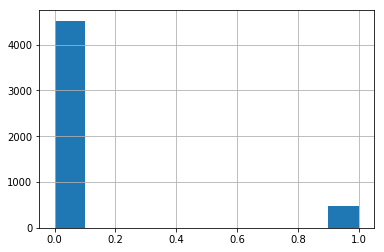

In [127]:
hist = df['Personal Loan'].hist()

In [130]:
# Here the ratio between personal loan not taken and taken is almost 9:1. 
# So our model will be more inclined towards the non-takers


In [128]:
# lets check for data and scatter plot as well

# Pairplot using sns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age (in years),5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience (in years),5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income (in K/month),5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family members,5000.0,2.395800,1.145340,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


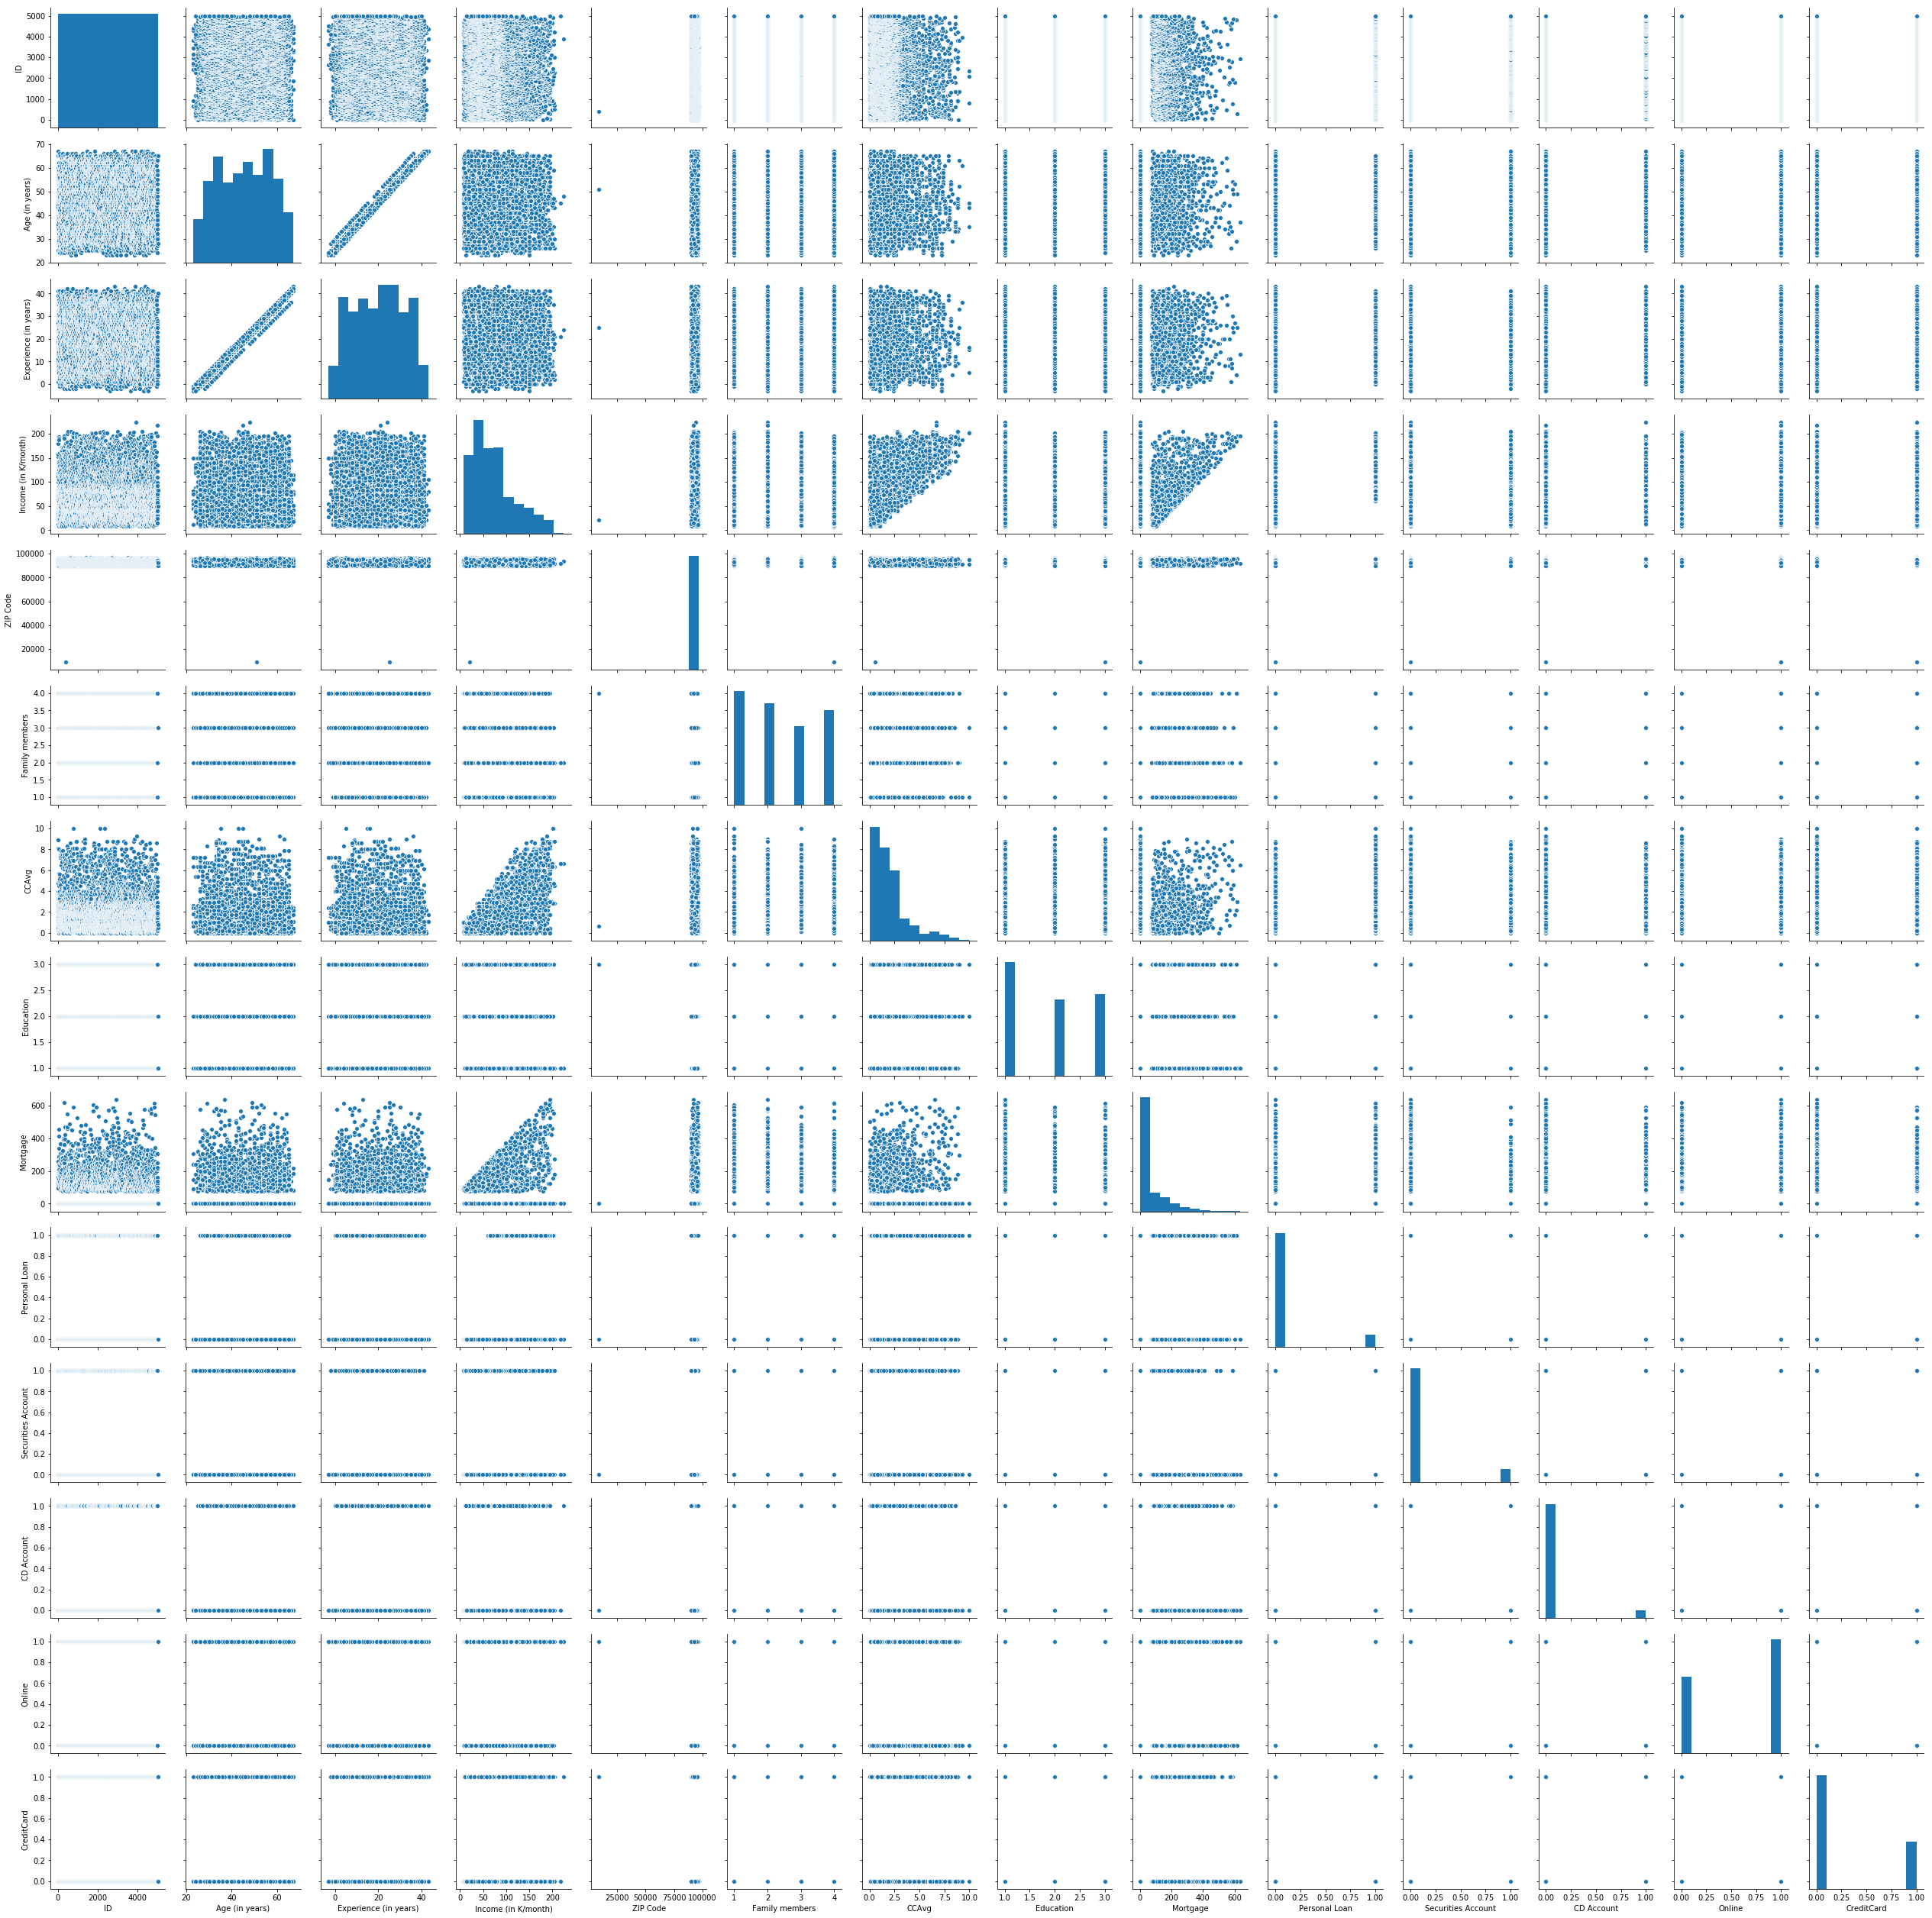

In [129]:
# As can be seen from above
# Income Attribute has some outliers which needs to be removed.
# Experience has min values in -ve, I think that is some error in data collection. So Values which are less than 0 needs to removed
# CCAvg also has some outliers.
# Mortage is not normali distributed. As most or all of the values are skewed towards higher percentile.

# Lets check for the pair plot as well

sns.pairplot(df)

In [131]:
# Age and Experience are extremly co-related.
# Will also check the VIF table for the same.
# lets first remove the outliers from the table... which are for Income, CCAvg

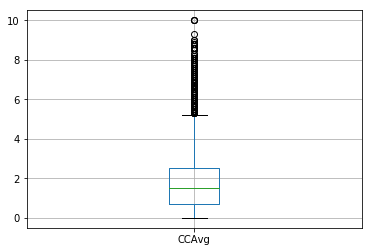

In [155]:
df.boxplot(column='CCAvg')

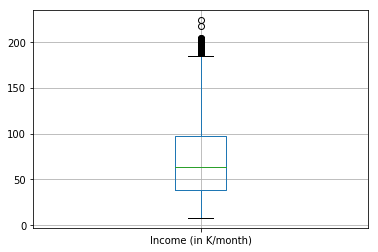

In [157]:
df.boxplot(column='Income (in K/month)')

In [219]:
# How many rows we are going to loos for Income
# which are 96.
Q1 = df['Income (in K/month)'].quantile(0.25)
Q3 = df['Income (in K/month)'].quantile(0.75)
IQR = Q3 - Q1
df[((df['Income (in K/month)'] < (Q1 - 1.5 * IQR)) |(df['Income (in K/month)'] > (Q3 + 1.5 * IQR)))].count()

ID                       96
Age (in years)           96
Experience (in years)    96
Income (in K/month)      96
ZIP Code                 96
Family members           96
CCAvg                    96
Education                96
Mortgage                 96
Personal Loan            96
Securities Account       96
CD Account               96
Online                   96
CreditCard               96
dtype: int64

In [220]:
# How many rows we are going to loos for CCAvg
Q1_c = df['CCAvg'].quantile(0.25)
Q3_c = df['CCAvg'].quantile(0.75)
IQR_c = Q3_c - Q1_c
df[((df['CCAvg'] < (Q1_c - 1.5 * IQR_c)) |(df['CCAvg'] > (Q3_c + 1.5 * IQR_c)))].count()

ID                       324
Age (in years)           324
Experience (in years)    324
Income (in K/month)      324
ZIP Code                 324
Family members           324
CCAvg                    324
Education                324
Mortgage                 324
Personal Loan            324
Securities Account       324
CD Account               324
Online                   324
CreditCard               324
dtype: int64

In [221]:
#from scipy import stats
#df_out = df[(np.abs(stats.zscore(df['Income (in K/month)'])) < 3)]

# Just dropping the outlier rows for Income and CCAvg
# Lets see how the distribution would be after removing the outliers

df_out = df[~((df['Income (in K/month)'] < (Q1 - 1.5 * IQR)) |(df['Income (in K/month)'] > (Q3 + 1.5 * IQR)))]

In [222]:
df_out = df_out[~((df_out['CCAvg'] < (Q1_c - 1.5 * IQR_c)) |(df_out['CCAvg'] > (Q3_c + 1.5 * IQR_c)))]

In [223]:
df_out.groupby('Personal Loan').count()

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4294,4294,4294,4294,4294,4294,4294,4294,4294,4294,4294,4294,4294
1,329,329,329,329,329,329,329,329,329,329,329,329,329


# 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (4 points)

In [224]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [225]:
def vif_table(data_to_vif):
    data_mat = data_to_vif.as_matrix()
    print(data_mat.shape)
    vif = [ variance_inflation_factor( data_mat, i ) for i in range( data_mat.shape[1] ) ]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = list(data_to_vif.columns)
    vif_factors['vif'] = vif
    print(vif_factors)

In [226]:
data_to_vif = df_out.drop('Personal Loan' , axis=1)
vif_table(data_to_vif)

(4623, 13)
                   column          vif
0                      ID     4.028978
1          Age (in years)  1264.861965
2   Experience (in years)   313.894075
3     Income (in K/month)     5.568387
4                ZIP Code   361.627266
5          Family members     5.532946
6                   CCAvg     3.803421
7               Education     6.809384
8                Mortgage     1.373381
9      Securities Account     1.275227
10             CD Account     1.371567
11                 Online     2.556710
12             CreditCard     1.554162


C:\Users\Sia\Anaconda2\envs\Python3.6\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [227]:
# From the above it can be seen that Age might be influencing Experience parameter
# Age has high influence on other parameter, lets drop it
data_to_vif1 = data_to_vif.drop('Age (in years)', axis=1)

In [228]:
vif_table(data_to_vif1)

(4623, 12)
                   column        vif
0                      ID   4.028885
1   Experience (in years)   4.104726
2     Income (in K/month)   5.566693
3                ZIP Code  25.351322
4          Family members   5.516186
5                   CCAvg   3.788310
6               Education   6.355066
7                Mortgage   1.373376
8      Securities Account   1.274337
9              CD Account   1.369270
10                 Online   2.555711
11             CreditCard   1.554064


C:\Users\Sia\Anaconda2\envs\Python3.6\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [229]:
# Zip Code can be dropped here
data_to_vif2 = data_to_vif1.drop('ZIP Code', axis=1)

In [230]:
vif_table(data_to_vif2)

C:\Users\Sia\Anaconda2\envs\Python3.6\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


(4623, 11)
                   column       vif
0                      ID  3.552837
1   Experience (in years)  3.494811
2     Income (in K/month)  4.872156
3          Family members  4.229348
4                   CCAvg  3.732980
5               Education  4.764940
6                Mortgage  1.366137
7      Securities Account  1.258097
8              CD Account  1.343034
9                  Online  2.381422
10             CreditCard  1.513923


In [231]:
print(df_out.shape)
print(data_to_vif2.shape)

(4623, 14)
(4623, 11)


In [232]:
# In addition to above analysed columns to delete ID can be deleted
columns_to_drop = ['ID', 'Age (in years)', 'ZIP Code']

In [233]:
df_out.drop(columns=columns_to_drop, inplace= True, axis=1)

In [234]:
df_out.shape

(4623, 11)

In [235]:
df_out.describe().T

,count,mean,std,min,25%,50%,75%,max
Experience (in years),4623.0,20.249621,11.504481,-3.0,10.0,20.0,30.0,43.0
Income (in K/month),4623.0,66.713390,39.584507,8.0,38.0,60.0,85.0,185.0
Family members,4623.0,2.423535,1.156765,1.0,1.0,2.0,4.0,4.0
CCAvg,4623.0,1.581157,1.175230,0.0,0.6,1.4,2.3,5.2
Education,4623.0,1.910664,0.837010,1.0,1.0,2.0,3.0,3.0
Mortgage,4623.0,53.195760,94.416063,0.0,0.0,0.0,98.0,612.0
Personal Loan,4623.0,0.071166,0.257130,0.0,0.0,0.0,0.0,1.0
Securities Account,4623.0,0.104261,0.305632,0.0,0.0,0.0,0.0,1.0
CD Account,4623.0,0.051698,0.221441,0.0,0.0,0.0,0.0,1.0
Online,4623.0,0.594419,0.491057,0.0,0.0,1.0,1.0,1.0


In [238]:
# Now need to drop the Experience values which are less than 0
# Or we should not drop them, may be other data is usefull, So lets make the values 0 for them which has less than 0 experience
df_out.loc[df_out['Experience (in years)'] < 0, 'Experience (in years)'] = 0

In [237]:
df_out.describe().T

,count,mean,std,min,25%,50%,75%,max
Experience (in years),4623.0,20.263682,11.478684,0.0,10.0,20.0,30.0,43.0
Income (in K/month),4623.0,66.713390,39.584507,8.0,38.0,60.0,85.0,185.0
Family members,4623.0,2.423535,1.156765,1.0,1.0,2.0,4.0,4.0
CCAvg,4623.0,1.581157,1.175230,0.0,0.6,1.4,2.3,5.2
Education,4623.0,1.910664,0.837010,1.0,1.0,2.0,3.0,3.0
Mortgage,4623.0,53.195760,94.416063,0.0,0.0,0.0,98.0,612.0
Personal Loan,4623.0,0.071166,0.257130,0.0,0.0,0.0,0.0,1.0
Securities Account,4623.0,0.104261,0.305632,0.0,0.0,0.0,0.0,1.0
CD Account,4623.0,0.051698,0.221441,0.0,0.0,0.0,0.0,1.0
Online,4623.0,0.594419,0.491057,0.0,0.0,1.0,1.0,1.0


# 3. Model the data using Logistic regression (4 points)

In [242]:
from sklearn.linear_model import LogisticRegression

In [240]:
#Lets split the data into train and test as 70:30
X = df_out.drop("Personal Loan", axis=1)
y = df_out["Personal Loan"]
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [243]:
model = LogisticRegression()

In [244]:
model.fit(X_train, y_train)

C:\Users\Sia\Anaconda2\envs\Python3.6\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# 4. Find the accuracy of the model using confusion matrix (4 points)

In [245]:
y_predict = model.predict(X_test)

In [246]:
model_score = model.score(X_test, y_test)
model_score

0.9509733237202596

In [247]:
metrics.confusion_matrix(y_test, y_predict)

array([[1261,   12],
       [  56,   58]], dtype=int64)

In [269]:
#                 Predicted
#                0            1
#---------------------------------------
#          0 |   1261        12
#            |
# Actual     |
#            |
#          1 |     56        58 
#            |

# Analyzing the confusion matrix¶
# True Positives (TP): we correctly predicted that Person took loan 58

# True Negatives (TN): we correctly predicted that they don't took loan 1261

# False Positives (FP): we incorrectly predicted that they do took loan (a "Type I error") 12 Falsely predict positive Type I error

# False Negatives (FN): we incorrectly predicted that they don't took loan (a "Type II error") 56 Falsely predict negative Type II error


# Recall for predicting the person tool loan is

# TP/(TP+FN) = 58/(58+56) = 0.5087 = 50.87% percent considering the default threshold of 0.5.

In [250]:
from sklearn.metrics import roc_curve, auc

In [251]:
y_predictProb = model.predict_proba(X_test)

In [252]:
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])

In [253]:
thresholds

array([1.99396562e+00, 9.93965621e-01, 7.77987888e-01, 7.37276427e-01,
       7.31729113e-01, 7.08397217e-01, 6.78273763e-01, 6.73848549e-01,
       6.43124480e-01, 6.41897520e-01, 6.08925383e-01, 5.93426046e-01,
       5.85394842e-01, 5.76621959e-01, 5.61144820e-01, 5.42903598e-01,
       5.09154909e-01, 5.07016208e-01, 5.06813935e-01, 4.95038558e-01,
       4.88869761e-01, 4.71994521e-01, 4.63848083e-01, 4.58742516e-01,
       4.42545569e-01, 4.40424027e-01, 4.31183742e-01, 4.30345313e-01,
       4.29735576e-01, 4.17311185e-01, 4.15035704e-01, 4.12718959e-01,
       3.96318525e-01, 3.95850498e-01, 3.71335176e-01, 3.64037957e-01,
       3.62139555e-01, 3.14629599e-01, 3.14161067e-01, 3.11146712e-01,
       3.10810030e-01, 3.09871343e-01, 3.07695293e-01, 3.05961553e-01,
       2.91742817e-01, 2.83898388e-01, 2.77468708e-01, 2.74030182e-01,
       2.64516520e-01, 2.58832805e-01, 2.57852120e-01, 2.45574854e-01,
       2.40539982e-01, 2.30803982e-01, 2.29482946e-01, 2.28388034e-01,
      

In [254]:
roc_auc = auc(fpr, tpr)
roc_auc

0.9649880789956038

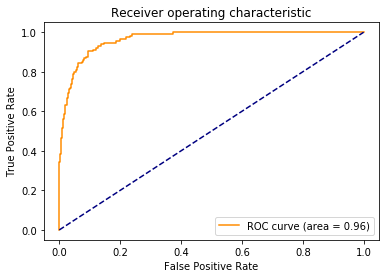

In [255]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [267]:
tpr[82]

0.9035087719298246

In [275]:
THRESHOLD = thresholds[82]
preds = np.where(model.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame(data=[accuracy_score(y_test, preds), 
                   recall_score(y_test, preds),
                   precision_score(y_test, preds)], 
             index=["accuracy", "recall", "precision"])

,0
accuracy,0.904831
recall,0.894737
precision,0.459459


In [276]:
# With the balanced Type1 and Type2 error acuracy is 90%, Recall is 89% and Precision is 45%

# 5. Use K - NN model [Hint: Try different values of k] and compare the accuracy of this model with that of Logistic regression (10 points)

In [277]:
X_z = X.apply(zscore)  # convert all attributes to Z scale 

In [278]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_k_train, X_k_test, y_k_train, y_k_test = train_test_split(X_z, y, test_size=test_size, random_state=seed)

In [279]:
from sklearn.neighbors import KNeighborsClassifier

In [280]:
col = ['k','Accuracy']
mse_df = pd.DataFrame(columns=col)

In [281]:
# running the model 1,3,5 ..... 21 values of k. lets see how the accuracy score result is

In [282]:

for x in range(1, 22, 2):
    knn_model_x = KNeighborsClassifier(n_neighbors= x)
    knn_model_x.fit(X_k_train, y_k_train)
    y_k_predict = knn_model_x.predict(X_k_test)
    accuracy = accuracy_score(y_k_test, y_k_predict)
    df2 = pd.DataFrame([[x, accuracy]], columns=['k','Accuracy'])
    mse_df = mse_df.append(df2) #, ignore_index=True)

In [283]:
mse_df

,k,Accuracy
0,1,0.956741
0,3,0.958183
0,5,0.950973
0,7,0.946647
0,9,0.944484
0,11,0.944484
0,13,0.942322
0,15,0.940880
0,17,0.940159
0,19,0.940159


In [284]:
# With k=3 Highest accuracy is achieved

In [285]:
# If we compare the results with Logistic Regression (Consider 0.5 threshold)
# Logistic Regression Accuracy : 95.09 %  
# kNN Model Accuracy           : 95.81 %

# So both models are giving almost same accuracy score, but kNN is providing little more compared to Logistic regression